# TECHNOHACKS INTERNSHIP

# TASK-2

# TWITTER US AIRLINE SENTIMENT

**Sentiment Analysis**: the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

In [1]:
#importing libraries 
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets = pd.read_csv("C:\\Users\\saisu\\OneDrive\\Documents\\Tweets.csv")

In [3]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

 **CHECKING FOR NULL VALUES**

In [5]:
tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
tweets.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1,inplace=True)

# DATA VISUALIZATION

In [7]:
tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

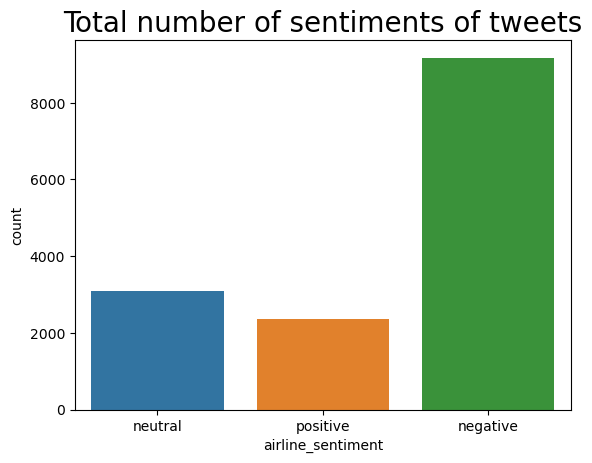

In [8]:

ax = sns.countplot(data=tweets,x='airline_sentiment')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

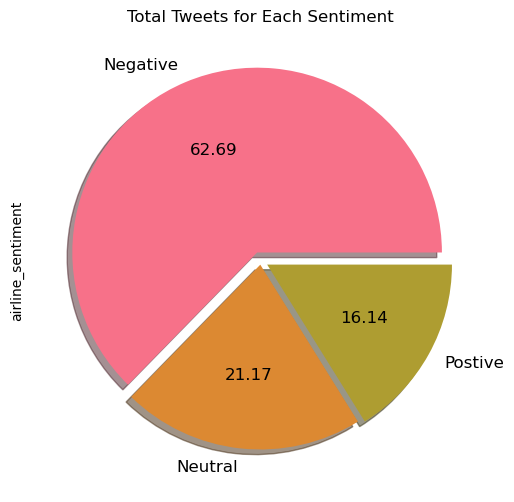

In [9]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(tweets['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

In [10]:
tweets.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

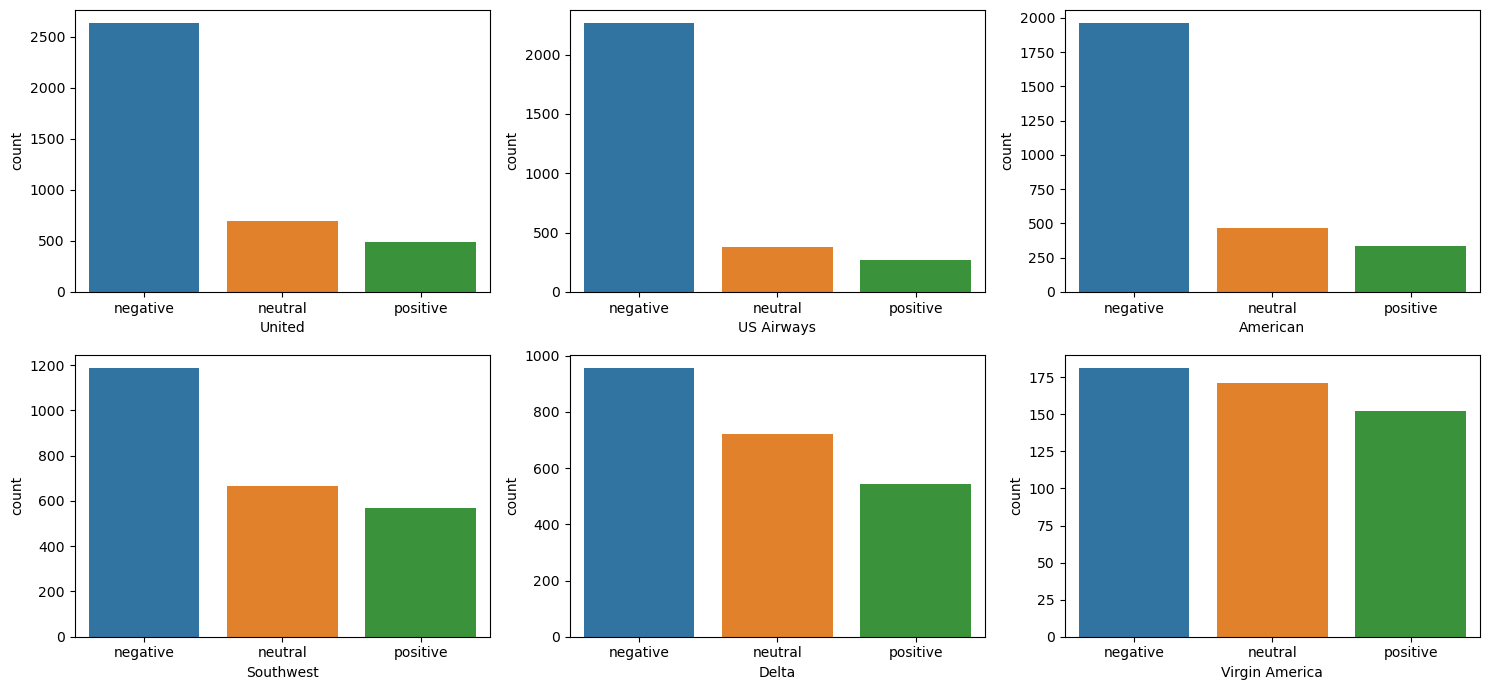

In [11]:
def plot_sentiment(Airline):
    df1 = tweets[tweets['airline']==Airline]
    count=df1['airline_sentiment'].value_counts().reset_index().rename(columns={'index':Airline,'airline_sentiment':'count'})
    sns.barplot(data=count,x=Airline,y='count')
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plot_sentiment('United')
plt.subplot(2,3,2)
plot_sentiment('US Airways')
plt.subplot(2,3,3)
plot_sentiment('American')
plt.subplot(2,3,4)
plot_sentiment('Southwest')
plt.subplot(2,3,5)
plot_sentiment('Delta')
plt.subplot(2,3,6)
plot_sentiment('Virgin America')
plt.tight_layout()
plt.show()



 From the above plots one can find that the distribution of moods for the first three airlines are always skewed toward negative moods. On contrary, the moods are distributed more balanced with the later three airline companies.

In [12]:
tweets['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

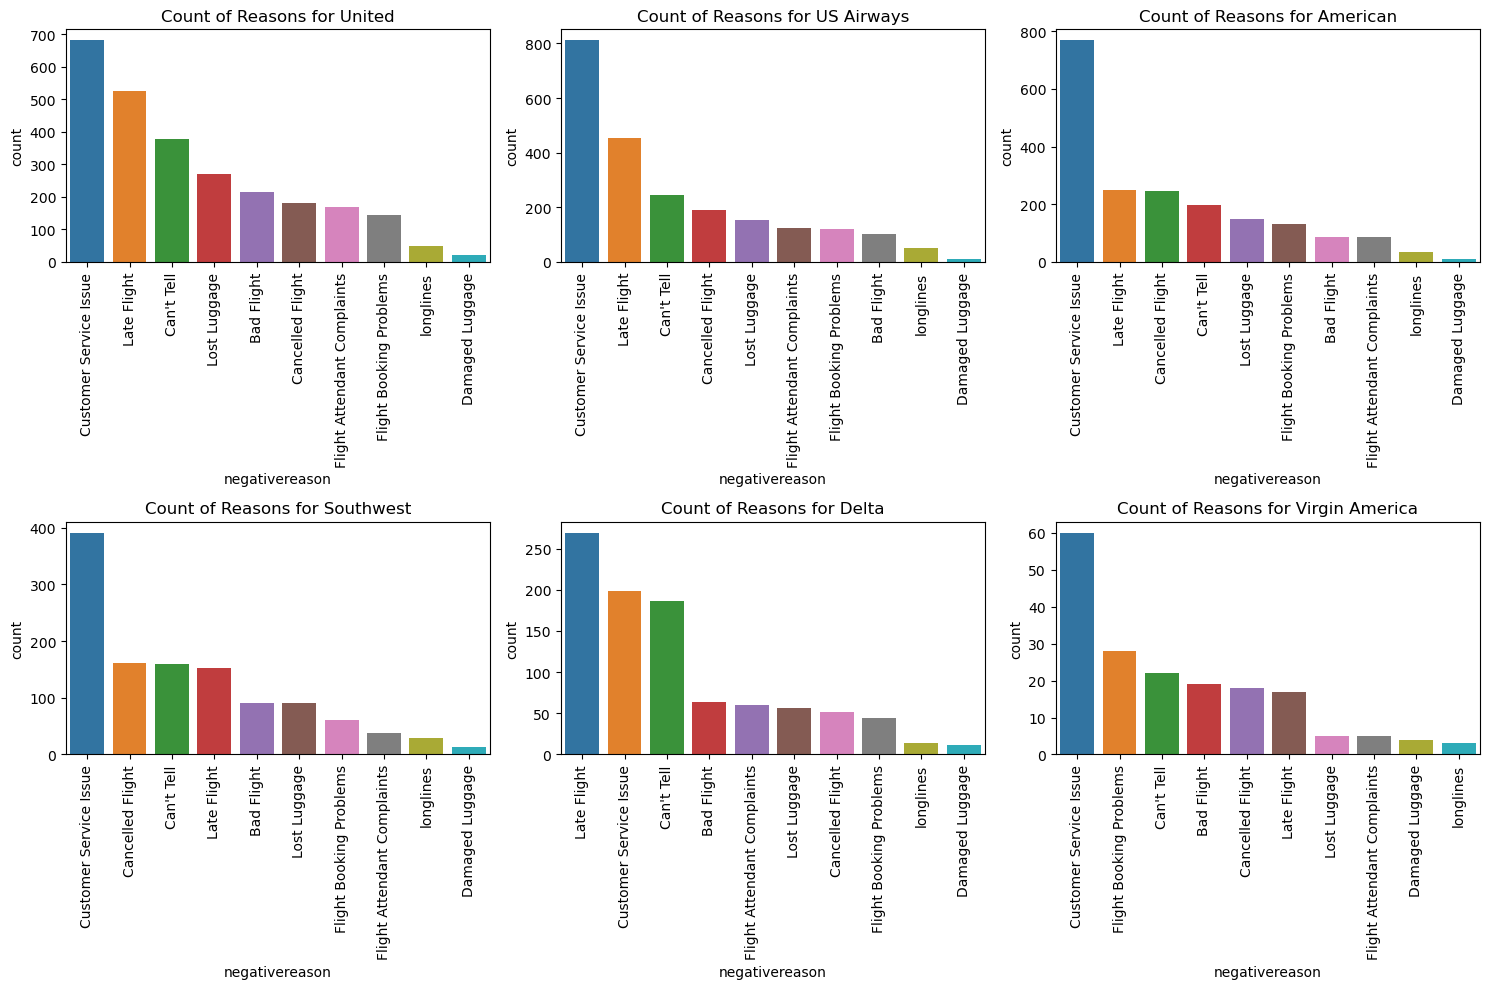

In [13]:
def plot_reason(Airline):
    df2 = tweets[tweets['airline']==Airline]
    count=df2['negativereason'].value_counts().reset_index().rename(columns={'index':'negativereason','negativereason':'count'})
    sns.barplot(data=count,x='negativereason',y='count')
    plt.title('Count of Reasons for '+Airline)
    plt.xticks(rotation=90)
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plot_reason('United')
plt.subplot(2,3,2)
plot_reason('US Airways')
plt.subplot(2,3,3)
plot_reason('American')
plt.subplot(2,3,4)
plot_reason('Southwest')
plt.subplot(2,3,5)
plot_reason('Delta')
plt.subplot(2,3,6)
plot_reason('Virgin America')
plt.tight_layout()
plt.show()


# WORDCLOUD VISUALIZATION

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

**Word Cloud for the negative Tweets**

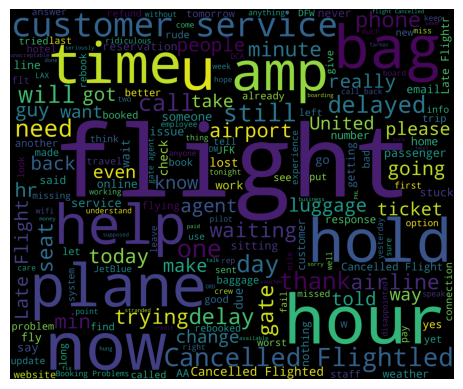

In [16]:

from wordcloud import WordCloud,STOPWORDS

df3 = tweets[tweets['airline_sentiment']=='negative']
words = ' '.join(df3['text'])
cleaned_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word!='RT'])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the Tweets with negative moods are frequently involved some words like time ,flight, hour,help,hold,plane cancelled,customer service . People might guess that customer tends to complain when they are waiting for the delayed flights.

**Word Cloud for the negative Tweets**

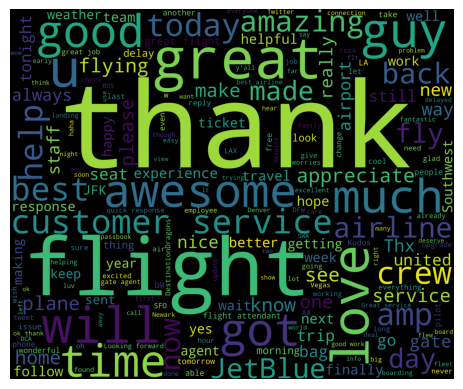

In [17]:
df4 = tweets[tweets['airline_sentiment']=='positive']
words = ' '.join(df4['text'])
cleaned_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word!='RT'])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the Tweets with positive moods are frequently involved some words like thank,good,awesome, flight ,time,etc.

**Word Cloud for the neutral Tweets**

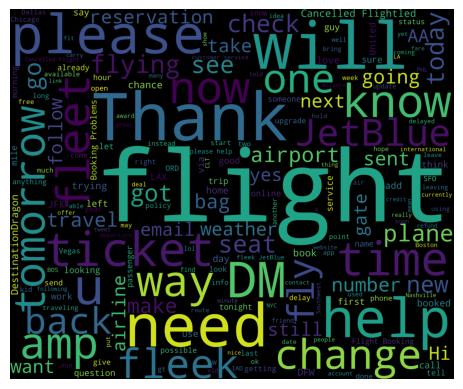

In [18]:
df5 = tweets[tweets['airline_sentiment']=='neutral']
words = ' '.join(df5['text'])
cleaned_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word!='RT'])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the Tweets with positive moods are frequently involved some words like ticket,thank,tomorrow, flight ,please etc.

# DATA PREPROCESSING

In [19]:
import nltk
import re
from nltk.corpus import stopwords

In [20]:

def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [21]:
# Apply convert_Sentiment function
tweets.airline_sentiment = tweets.airline_sentiment.apply(lambda x : convert_Sentiment(x))


In [22]:
tweets.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [23]:
tweets.text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [24]:

# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


In [25]:
# Remove punctuations
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

In [26]:
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



In [27]:
# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

In [28]:
# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [29]:
# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute



In [30]:
# combaine negative reason with  tweet (if exsist)
df = pd.DataFrame()
df['final_text'] = tweets['negativereason'].fillna('') + ' ' + tweets['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))



In [31]:
df['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

**X&Y**

In [32]:
X = df["final_text"]
y = tweets["airline_sentiment"]

In [33]:
X

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [34]:
y

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

**apply TFIDF on cleaned tweets**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

**HANDLING IMBALANCE**

In [37]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import SMOTE 

In [40]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

**train-test-split**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

# MODELLING & EVALUATION

In [43]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.naive_bayes import MultinomialNB

In [46]:
# List of classifier models

classifiers = {

    'RandomForest': RandomForestClassifier(),

    'Support Vector Machine': SVC(),

     'KNN': KNeighborsClassifier(),

     'LogisticRegression': LogisticRegression(max_iter=100),

     'Decision Tree': DecisionTreeClassifier(),
     
     'Adaboost classifier':AdaBoostClassifier(),
     
     'Gradientboosting classifier':GradientBoostingClassifier(),
     
      'XGB Classifier': XGBClassifier(),
    
      "Navie bayes": MultinomialNB()
}

results = pd.DataFrame(columns=['Accuracy', 'Bias', 'variance'])

for method, cls in classifiers.items():

#train the classifier

    cls.fit(X_train,y_train)

#Predicting the test set results

    y_pred = cls.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    bias = cls.score(X_train,y_train)

    variance = cls.score(X_test, y_test)

    results.loc[method]=[acc, bias, variance]

#Making the Confusion matrix

    from sklearn.metrics import confusion_matrix

    cm= confusion_matrix(y_test,y_pred)

**CONFUSION MATRIX**

In [47]:
cm

array([[2267,   56,   20],
       [ 385, 1639,  240],
       [ 117,  129, 2031]], dtype=int64)

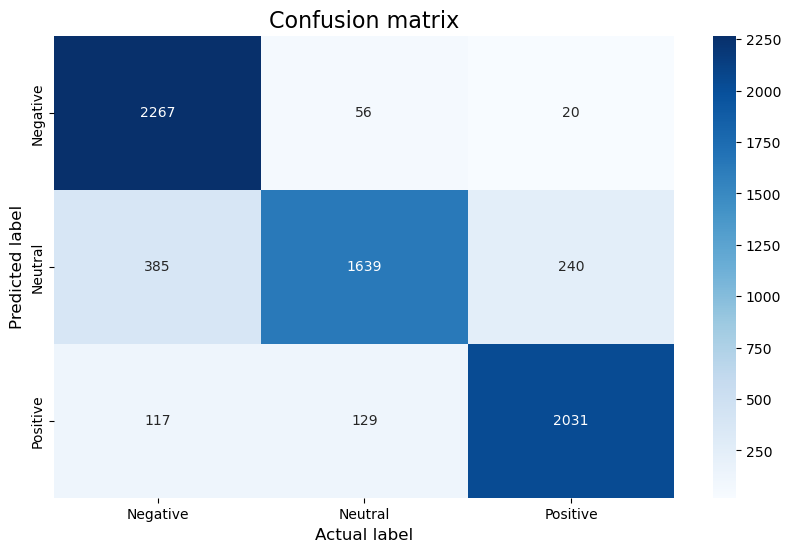

In [58]:

# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()


**CLASSIFICATION REPORT**

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2343
           1       0.90      0.72      0.80      2264
           2       0.89      0.89      0.89      2277

    accuracy                           0.86      6884
   macro avg       0.87      0.86      0.86      6884
weighted avg       0.87      0.86      0.86      6884



**RESULTS**

In [60]:
results

,Accuracy,Bias,variance
RandomForest,0.959762,0.996562,0.959762
Support Vector Machine,0.938408,0.961743,0.938408
KNN,0.595874,0.654044,0.595874
LogisticRegression,0.904707,0.927845,0.904707
Decision Tree,0.942040,0.996562,0.942040
Adaboost classifier,0.836432,0.834092,0.836432
Gradientboosting classifier,0.884079,0.882760,0.884079
XGB Classifier,0.924898,0.948523,0.924898
Navie bayes,0.862435,0.893705,0.862435


in above models **RANDOMFOREST** is best.